## Credit card Froud Detection 

#### The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

#### for more about datasets visit: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### * Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
# for displaying whole data
from IPython.display import display
%matplotlib inline
path="creditcard.csv"
df=pd.read_csv(path)



### EDA :Exploratory Data Analysis

import pandas_profiling as pp
pp.ProfileReport(df=df)

In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Data Visualization

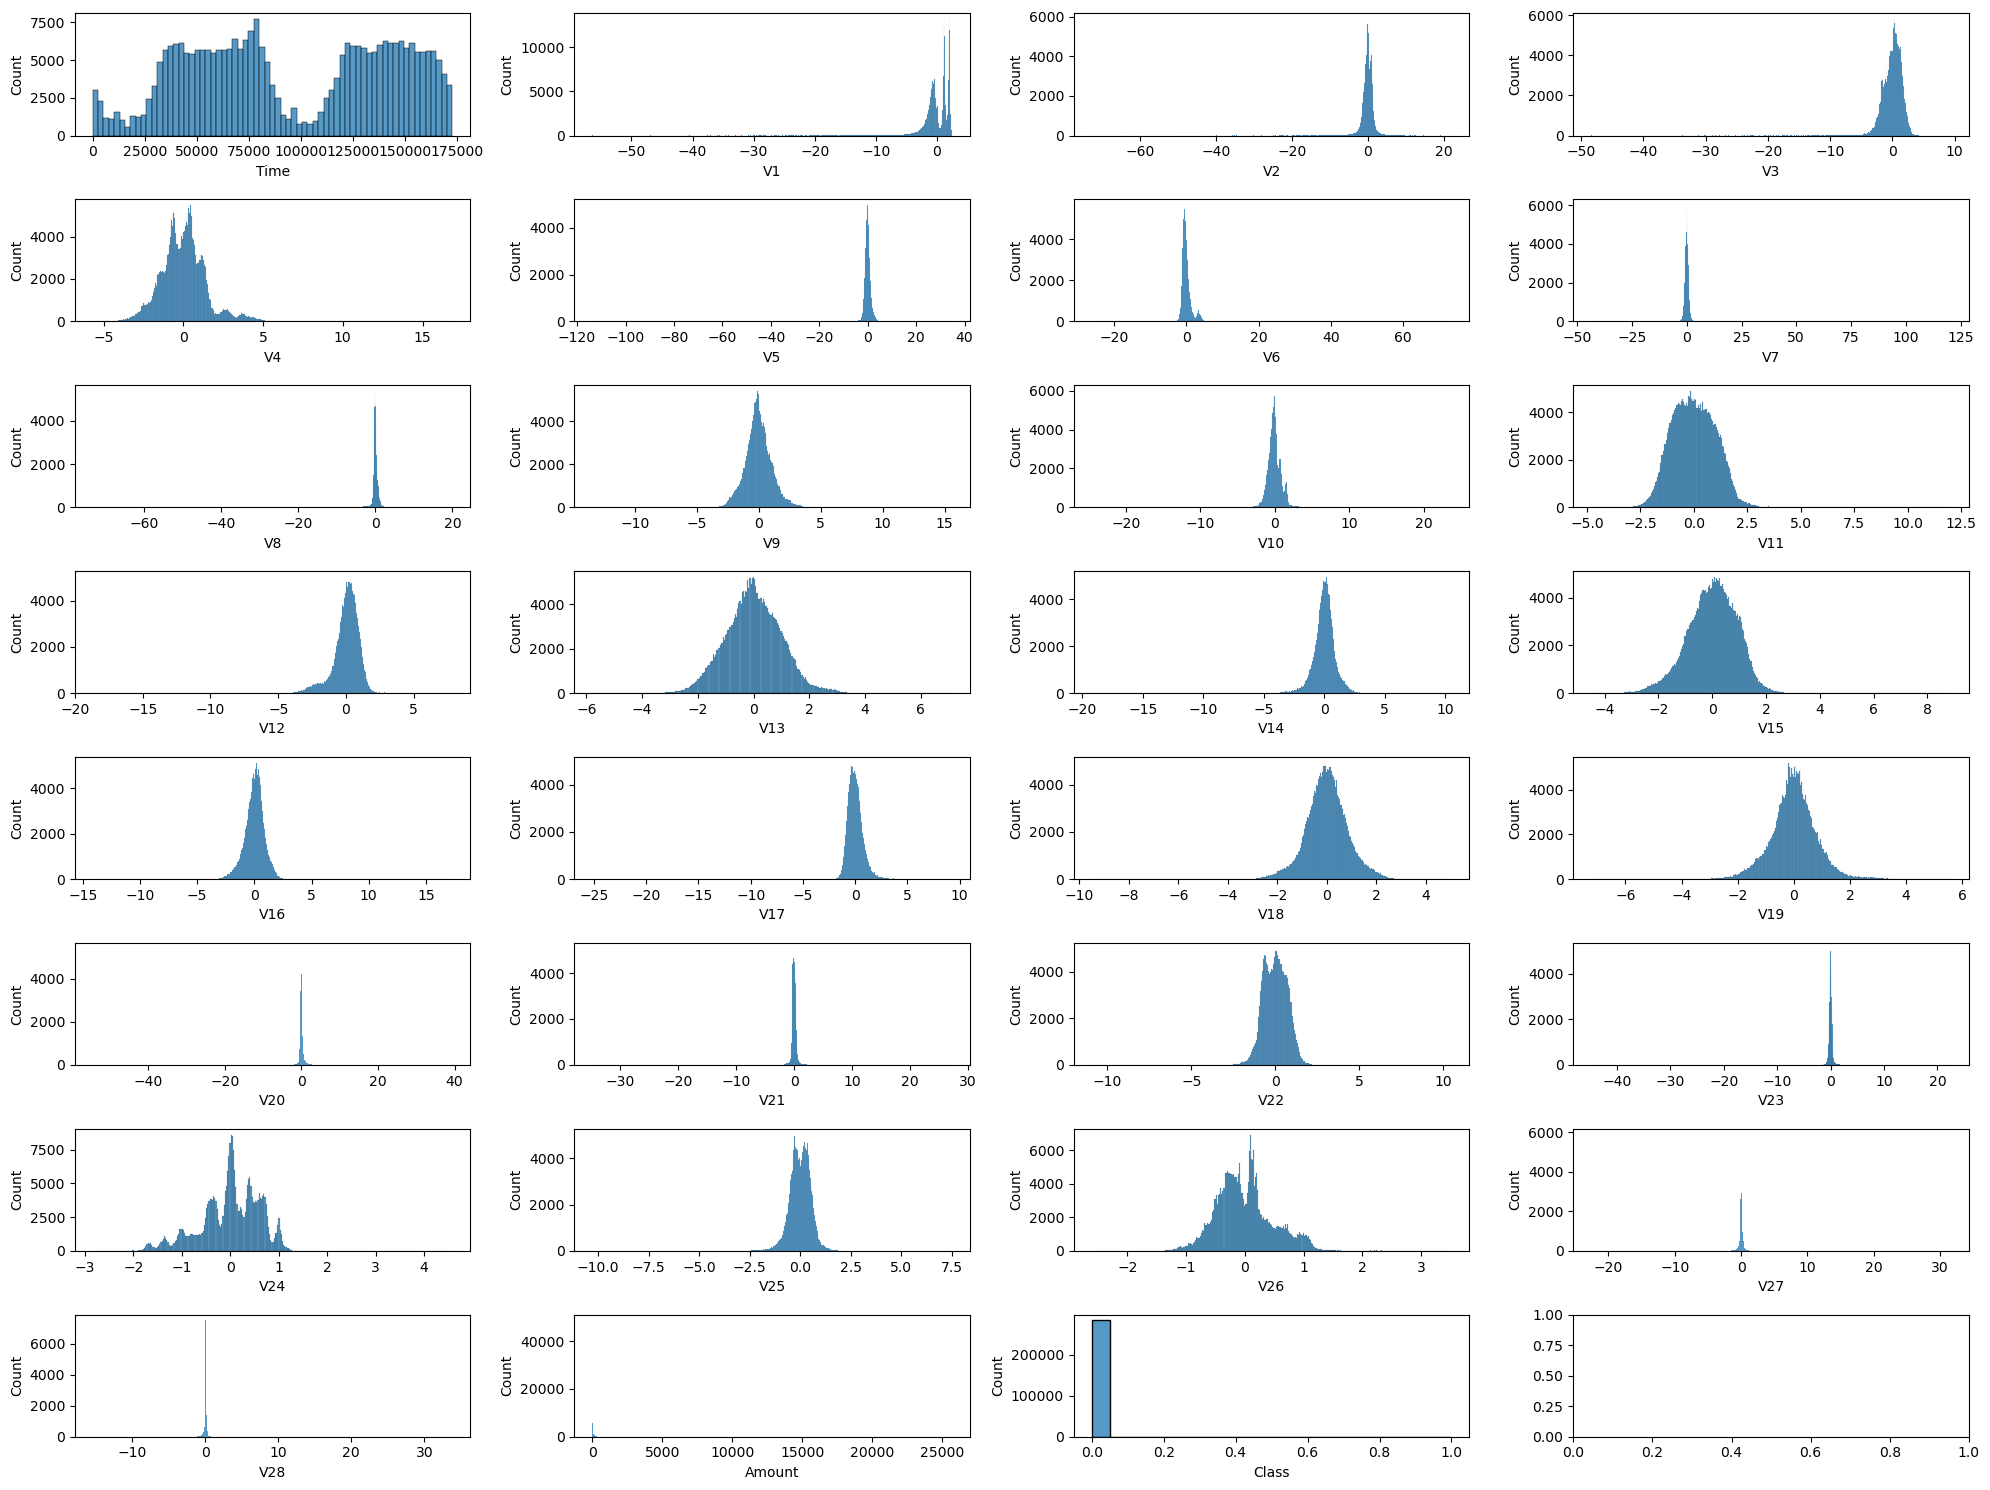

In [3]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20,15))

# Create a histplot for each column in the DataFrame
for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=axes[i // 4, i % 4])
plt.tight_layout()
plt.show()

#### We can see that our Data is imbalanced.
##### so we are using SMOTE method for preprocessing the data

In [4]:
y=df['Class']
X=df.drop('Class',axis=1)


We are going to use SMOTE for oversampling, than with PCA we are going to reduce the dimensions and with standardizing we try to achieve better perfomance.

SMOTE (Synthetic Minority Over-sampling Technique) is an algorithm that is used to address class imbalance in a dataset. Imbalanced Data can lead to poor performance of machine learning models on the minority class, because the model may be biased towards the majority class. SMOTE works by synthesizing new examples for the minority class.

Using Principal component analysis (PCA) to reduce the dimension of the features:
The main idea behind PCA is that the dataset can often be represented with fewer dimensions while still retaining most of the information. For example, our dataset have many features (dimensions) that are correlated with one another, so it can be represented with fewer features without much loss of information.

StandardScaler is a preprocessing technique that is often used in machine learning pipelines to standardize the features of a dataset. It scales the features of the dataset so that they have zero mean and unit variance. Standardizing the data can make it easier for machine learning algorithms to learn from the data, because the features are on a similar scale and do not have large differences in range

### MODELING

In [5]:

def evaluate_models(X,y):
    from sklearn.naive_bayes import GaussianNB, BernoulliNB
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from xgboost import XGBClassifier

    #splitting the data in train test  split
    from sklearn.model_selection import train_test_split
    from sklearn.decomposition import PCA
    from imblearn.over_sampling import SMOTE
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    from math import sqrt
    from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,mean_absolute_error
    from sklearn.metrics import confusion_matrix,classification_report
    # dataset=dataset[dataset[column_to_be_studied].notnull()]
    sm=SMOTE(random_state=42)
    X,y=sm.fit_resample(X,y)
    pca=PCA(n_components=2)
    X=pca.fit_transform(X)
    scaler.fit(X)
    X=scaler.transform(X)
    x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

    #models
#     GNB=GaussianNB()
#     BNB=BernoulliNB()
    #     SVC=SVC()
#     LR=LogisticRegression()
    DTC=DecisionTreeClassifier()
    RFC=RandomForestClassifier()
    XGBC=XGBClassifier(eval_metric="logloss")
    KNN=KNeighborsClassifier()

    models=[DTC,RFC,XGBC,KNN]
    models_names=['DecisionTreeClassifier','RandomForestClassifier','XGBClassifier','KNeighborsClassifier']
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]

    for model in models:
        M=model.fit(x_train,y_train)
        preds=M.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,preds))
        precision_scored.append(precision_score(y_test,preds))
        recall_scored.append(recall_score(y_test,preds))
        f1_scored.append(f1_score(y_test,preds))

    result=pd.DataFrame(columns=['f1_score','accuracy_score','precision_score','recall_score'], index=models_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored

    return result.sort_values('accuracy_score',ascending=False)



### create dataframe with result

In [6]:
result = evaluate_models(X,y)


In [7]:
result


,f1_score,accuracy_score,precision_score,recall_score
DecisionTreeClassifier,0.939875,0.939293,0.932759,0.947101
RandomForestClassifier,0.935679,0.934852,0.925753,0.945819
KNeighborsClassifier,0.890910,0.886605,0.859907,0.924231
XGBClassifier,0.873666,0.873353,0.873244,0.874087


In [13]:
#decision tree classifier leads the better accuracy 
#so tuning paremeters for decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DTC=DecisionTreeClassifier()
sm=SMOTE(random_state=42)
X,y=sm.fit_resample(X,y)
pca=PCA(n_components=2)
X=pca.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
parameters={
    'criterion':['entropy'],
    'min_samples_split':[1,2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'random_state':[42]
    
}
GV=GridSearchCV(DTC,parameters,cv=5,scoring='accuracy')
GV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'random_state': [42]},
             scoring='accuracy')

In [15]:
print("Best parameters: ", GV.best_params_)
print("Best score: ", GV.best_score_)

Best parameters:  {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
Best score:  0.9306732835681121


In [16]:
#now using kfold cross validation
from sklearn.model_selection import KFold
parameters={
    'criterion':['entropy'],
    'min_samples_split':[1,2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'random_state':[42]
    
}
kfold=KFold(n_splits=5, shuffle=True)
GV=GridSearchCV(DTC,parameters,cv=kfold,scoring='accuracy')
GV.fit(x_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'random_state': [42]},
             scoring='accuracy')

In [18]:
print("Best parameters: ", GV.best_params_)
print("Best score: ", GV.best_score_)

Best parameters:  {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
Best score:  0.9306535019478422
